# Backtesting Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf

import capstone_proj as cp

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,8)

filepath = "/Users/andresvillacis/Documents/GitHub/capstone_proj/Data/FX_Test_USD-per-FX_Chicago.csv"
experiment_data = cp.Batch(start='2003-01-01',end='2004-01-01',currencies=['USDEUR','USDGBP'],filepath=filepath)
# Testing to be between 2003 and 2012, with indicators running back up to 2002. Testing will be 2014 forward in year or randomized intervals

/usr/local/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
portfolio = cp.Portfolio(experiment_data)
price_data = experiment_data.px_data

portfolio.purchase_order('USDEUR',50000,price_data.loc['2003-01-10','USDEUR'],'2003-01-10')
portfolio.purchase_order('USDEUR',50000,price_data.loc['2003-02-20','USDEUR'],'2003-02-20')
portfolio.purchase_order('USDEUR',100000,price_data.loc['2003-03-17','USDEUR'],'2003-03-17')
portfolio.purchase_order('USDEUR',-300000,price_data.loc['2003-04-01','USDEUR'],'2003-04-01')
portfolio.purchase_order('USDGBP',100000,price_data.loc['2003-05-01','USDGBP'],'2003-05-01')
portfolio.purchase_order('USDGBP',-300000,price_data.loc['2003-07-01','USDGBP'],'2003-07-01')
portfolio.purchase_order('USDEUR',100000,price_data.loc['2003-09-01','USDEUR'],'2003-09-01')
portfolio.purchase_order('USDGBP',200000,price_data.loc['2003-09-01','USDGBP'],'2003-09-01')

returns,positions,transactions = portfolio.backtest_data()


## Summary Statistics

In [3]:
pf.show_perf_stats(returns=returns, positions=positions)

Start date,2003-01-02
End date,2004-01-01
Total months,12
,Backtest
Annual return,2.4%
Cumulative returns,2.5%
Annual volatility,1.6%
Sharpe ratio,1.47
Calmar ratio,2.47
Stability,0.82
Max drawdown,-1.0%


## Returns

<AxesSubplot:xlabel='DATE', ylabel='Cumulative returns'>

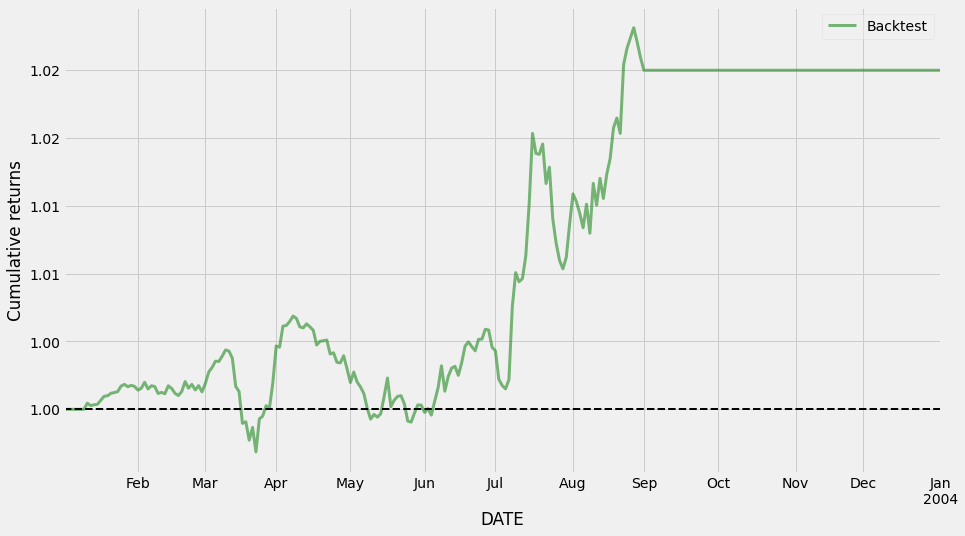

In [3]:
pf.plot_rolling_returns(returns=returns)

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

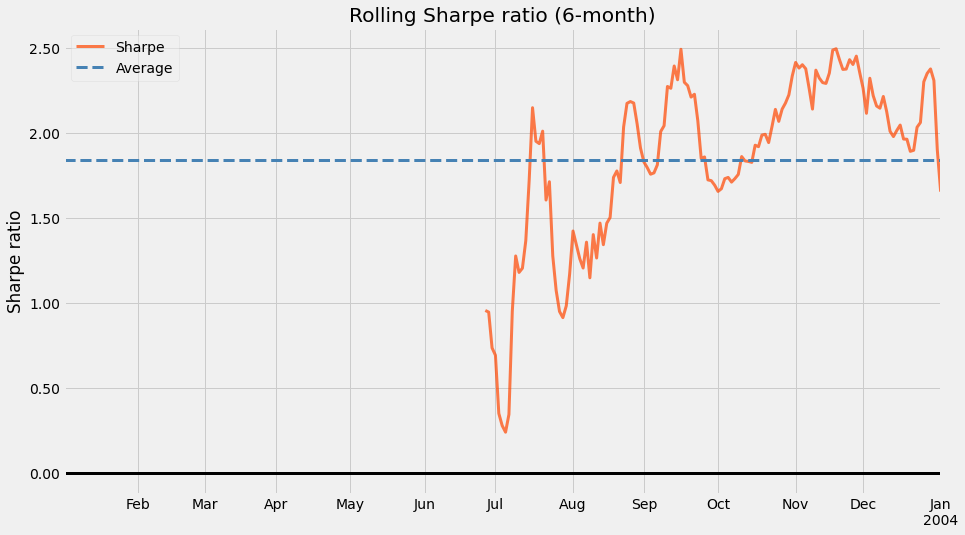

In [173]:
pf.plot_rolling_sharpe(returns=returns)

<AxesSubplot:xlabel='DATE', ylabel='Returns'>

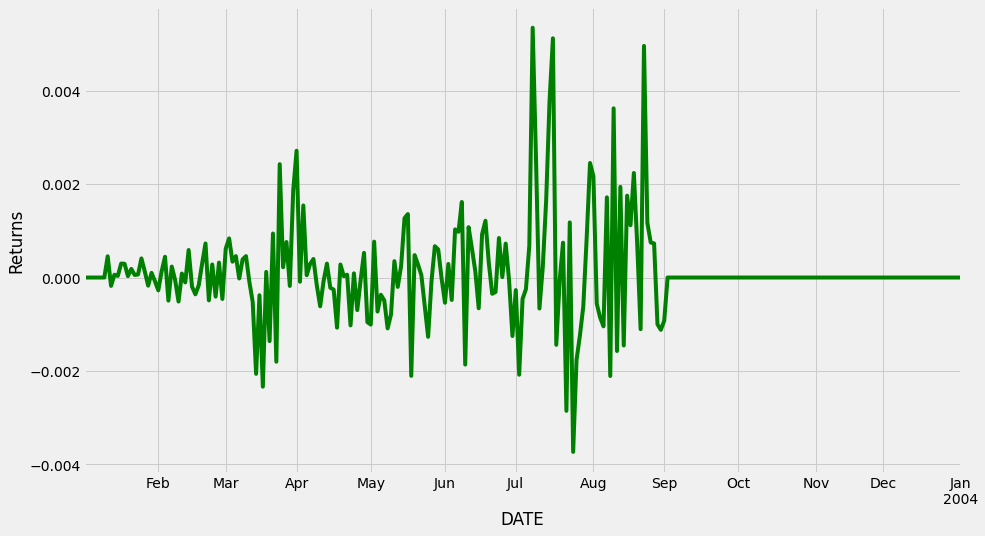

In [174]:
pf.plot_returns(returns=returns)

<AxesSubplot:xlabel='DATE'>

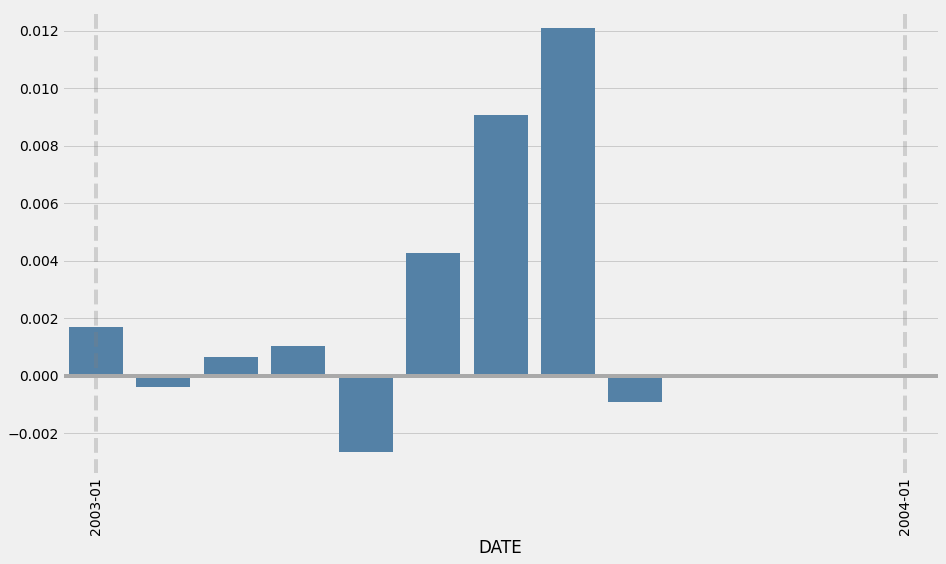

In [175]:
pf.plot_monthly_returns_timeseries(returns=returns)

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

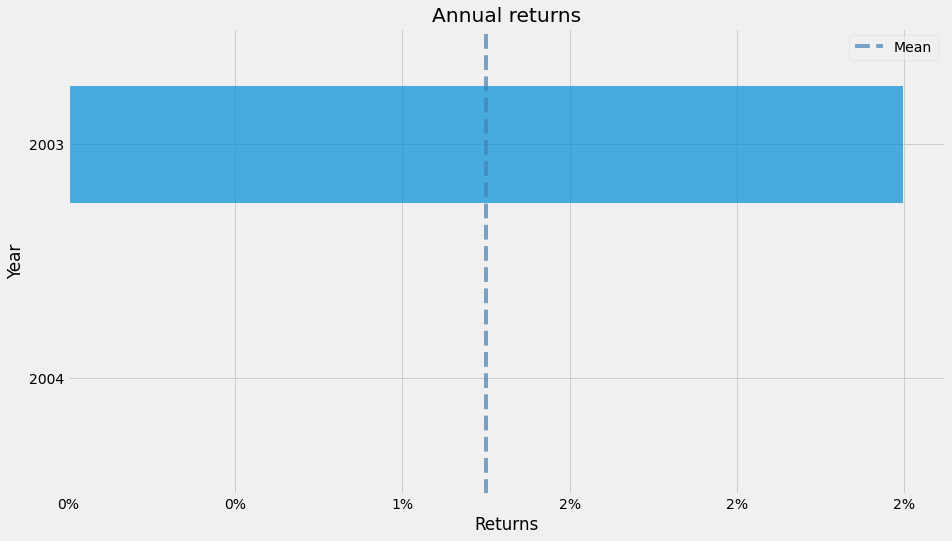

In [176]:
pf.plot_annual_returns(returns=returns)

## Volatility

In [211]:
'Max Drawdown is {}%'.format(round(100*pf.timeseries.max_drawdown(returns=returns)),5)

<ipython-input-211-6f41abce7873>:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  'Max Drawdown is {}%'.format(round(100*pf.timeseries.max_drawdown(returns=returns)),5)


'Max Drawdown is -1%'

<AxesSubplot:title={'center':'Underwater plot'}, ylabel='Drawdown'>

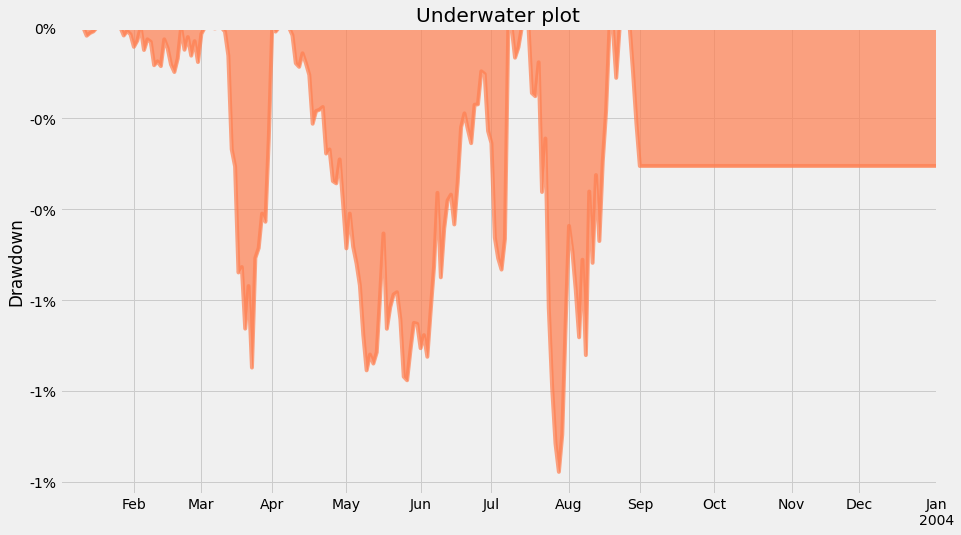

In [183]:
pf.plot_drawdown_underwater(returns=returns)

<AxesSubplot:title={'center':'Rolling volatility (6-month)'}, ylabel='Volatility'>

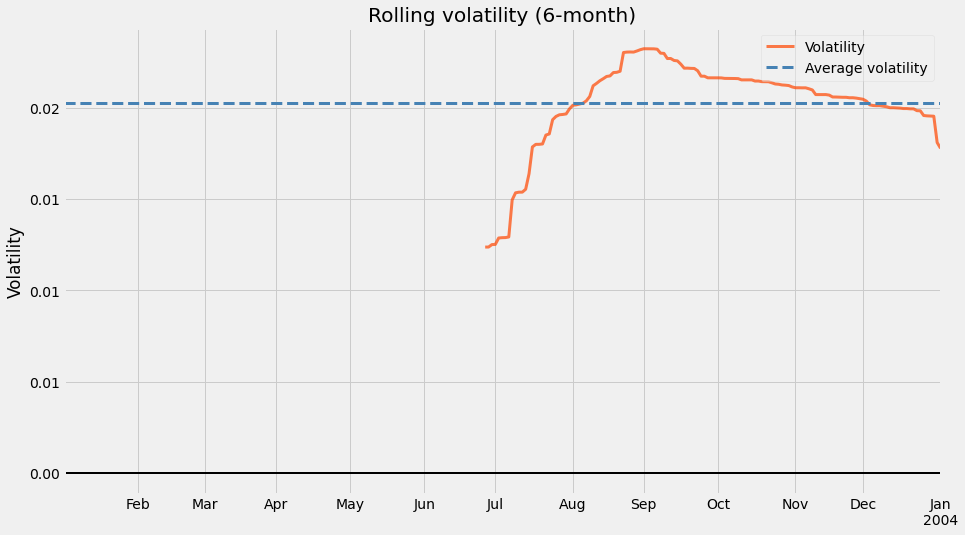

In [178]:
pf.plot_rolling_volatility(returns=returns)

## Exposure

<AxesSubplot:title={'center':'Exposure'}, ylabel='Exposure'>

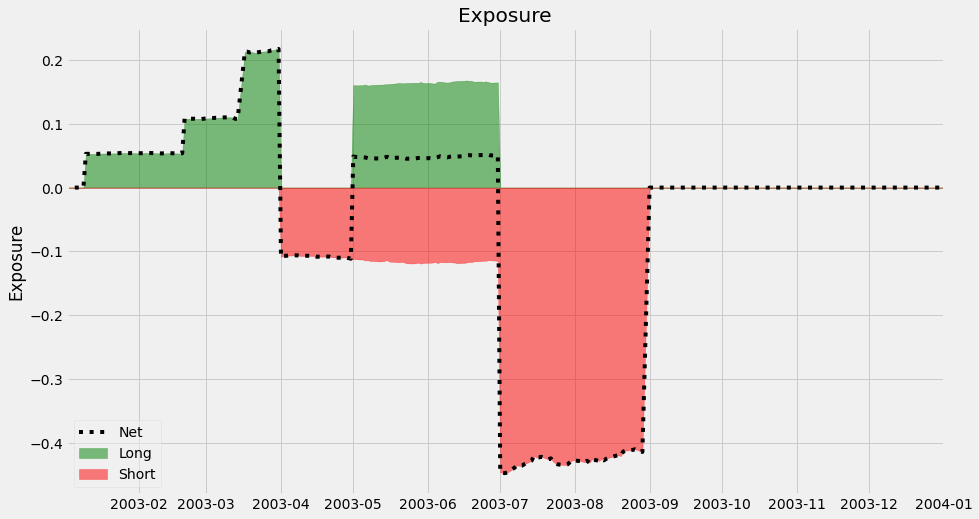

In [180]:
pf.plot_exposures(returns=returns,positions=positions)

<AxesSubplot:title={'center':'Gross leverage'}, ylabel='Gross leverage'>

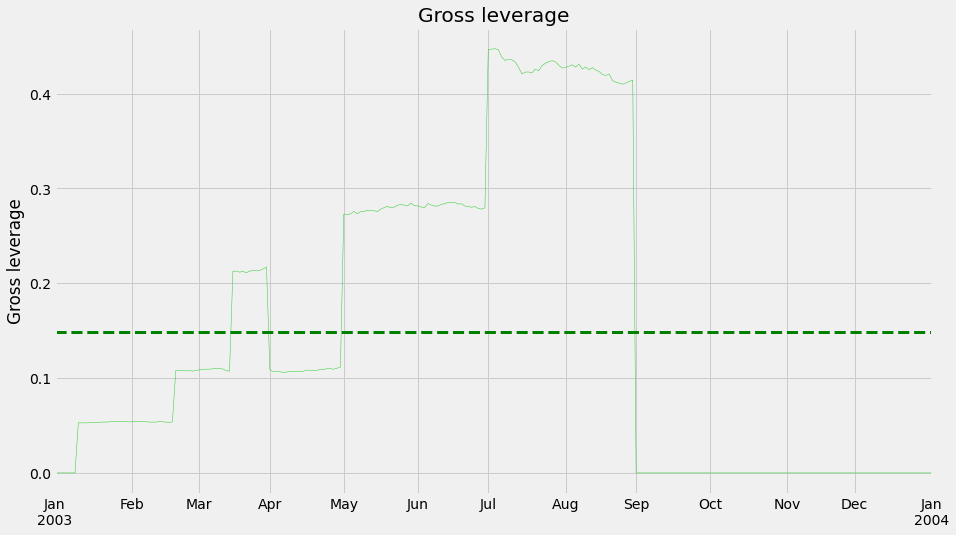

In [181]:
pf.plot_gross_leverage(returns=returns,positions=positions)

## Interesting

In [182]:
interesting_dates = pf.timeseries.extract_interesting_date_ranges(returns=returns)